# Inheritance

## Class Hierarchies

### Inheritance

In [ ]:
class Student:

    def __init__(self, name: str, id: str, email: str, credits: str):
        self.name = name
        self.id = id
        self.email = email
        self.credits = credits

class Teacher:

    def __init__(self, name: str, email: str, room: str, teaching_years: int):
        self.name = name
        self.email = email
        self.room = room
        self.teaching_years = teaching_years

Object-Oriented Programming biasanya memiliki teknik yang disebut *inheritance*, yang berarti suatu class dapat mewarisi trait dari class lain. Selain trait yang diwarisi tersebut, sebuah class juga dapat memiliki trait yang unik bagi dirinya sendiri. Untuk menggunakan inheritance, kita cukup menuliskan nama base class di dalam tanda kurung pada baris pertama saat mendefinisikan class baru. Contoh:

In [ ]:
class Person:

   def __init__(self, name: str, email: str):
       self.name = name
       self.email = email

   def update_email_domain(self, new_domain: str):
       old_domain = self.email.split("@")[1]
       self.email = self.email.replace(old_domain, new_domain)


class Student(Person):

   def __init__(self, name: str, id: str, email: str, credits: str):
       self.name = name
       self.id = id
       self.email = email
       self.credits = credits


class Teacher(Person):

   def __init__(self, name: str, email: str, room: str, teaching_years: int):
       self.name = name
       self.email = email
       self.room = room
       self.teaching_years = teaching_years

# Let's test our classes
if __name__ == "__main__":
   saul = Student("Saul Student", "1234", "saul@example.com", 0)
   saul.update_email_domain("example.edu")
   print(saul.email)

   tara = Teacher("Tara Teacher", "tara@example.fi", "A123", 2)
   tara.update_email_domain("example.ex")
   print(tara.email)

*Overriding* berarti "menimpa" metode lama dengan yang baru. Jika sebuah derived class memiliki method dengan nama yang sama seperti di base class, maka method versi derived akan menggantikan versi asli saat objek dari derived class digunakan. Contoh:

In [ ]:
class Book:
   """ This class models a simple book """
   def __init__(self, name: str, author: str):
       self.name = name
       self.author = author


class BookContainer:
   """ This class models a container for books """

   def __init__(self):
       self.books = []

   def add_book(self, book: Book):
       self.books.append(book)

   def list_books(self):
       for book in self.books:
           print(f"{book.name} ({book.author})")


class Bookshelf(BookContainer):
   """ This class models a shelf for books """

   def __init__(self):
       super().__init__()

   def add_book(self, book: Book, location: int):
       self.books.insert(location, book)

if __name__ == "__main__":
   # Create some books for testing
   b1 = Book("Old Man and the Sea", "Ernest Hemingway")
   b2 = Book("Silent Spring", "Rachel Carson")
   b3 = Book("Pride and Prejudice", "Jane Austen")

   # Create a BookContainer and add the books
   container = BookContainer()
   container.add_book(b1)
   container.add_book(b2)
   container.add_book(b3)

   # Create a Bookshelf and add the books (always to the beginning)
   shelf = Bookshelf()
   shelf.add_book(b1, 0)
   shelf.add_book(b2, 0)
   shelf.add_book(b3, 0)


   # Tulostetaan
   print("Container:")
   container.list_books()

   print()

   print("Shelf:")
   shelf.list_books()

### Inheritance dan scope of traits

Sebuah derived class mewarisi semua trait dari base class-nya. Trait tersebut dapat langsung diakses di dalam derived class, kecuali jika trait tersebut didefinisikan sebagai private di base class (dengan dua underscore di depan nama trait). Setiap trait di base class dapat diakses dari derived class menggunakan fungsi `super()`. Argumen `self` tidak perlu dituliskan dalam pemanggilan method, karena Python menambahkannya secara otomatis. Contoh:

In [ ]:
class Book:
    """ This class models a simple book """

    def __init__(self, name: str, author: str):
        self.name = name
        self.author = author


class Thesis(Book):
    """ This class models a graduate thesis """

    def __init__(self, name: str, author: str, grade: int):
        super().__init__(name, author)
        self.grade = grade

if __name__ == "__main__":
    thesis = Thesis("Python and the Universe", "Peter Pythons", 3)

    # Print out the values of the attributes
    print(thesis.name)
    print(thesis.author)
    print(thesis.grade)

In [ ]:
class Product:

    def __init__(self, name: str, price: float):
        self.name = name
        self.price = price

class BonusCard:

    def __init__(self):
        self.products_bought = []

    def add_product(self, product: Product):
        self.products_bought.append(product)

    def calculate_bonus(self):
        bonus = 0
        for product in self.products_bought:
            bonus += product.price * 0.05

        return bonus

class PlatinumCard(BonusCard):

    def __init__(self):
        super().__init__()

    def calculate_bonus(self):
        # Call the method in the base class
        bonus = super().calculate_bonus()

        # ...and add five percent to the total
        bonus = bonus * 1.05
        return bonus
    
if __name__ == "__main__":
    card = BonusCard()
    card.add_product(Product("Bananas", 6.50))
    card.add_product(Product("Satsumas", 7.95))
    bonus = card.calculate_bonus()

    card2 = PlatinumCard()
    card2.add_product(Product("Bananas", 6.50))
    card2.add_product(Product("Satsumas", 7.95))
    bonus2 = card2.calculate_bonus()

    print(bonus)
    print(bonus2)

### Latihan

Kerjakan latihan di <https://programming-25.mooc.fi/part-10/1-class-hierarchies>

## Access Modifiers

Misalkan kita menggunakan private attribute dalam kasus inheritance:

In [ ]:
class Notebook:
    """ A Notebook stores notes in string format """

    def __init__(self):
        # private attribute
        self.__notes = []

    def add_note(self, note):
        self.__notes.append(note)

    def retrieve_note(self, index):
        return self.__notes[index]

    def all_notes(self):
        return ",".join(self.__notes)
    
class NotebookPro(Notebook):
    """ A better Notebook with search functionality """
    def __init__(self):
        # This is OK, the constructor is public despite the underscores
        super().__init__()

    # This causes an error
    def find_notes(self, search_term):
        found = []
        # the attribute __notes is private
        # the derived class can't access it directly
        for note in self.__notes:
            if search_term in note:
                found.append(note)

        return found
    
notebook_pro = NotebookPro()
notebook_pro.find_notes("Heyy")

### Protected traits

Banyak bahasa pemrograman berorientasi objek memiliki fitur, biasanya berupa keyword khusus, untuk melindungi traits. Ini berarti bahwa suatu trait harus disembunyikan dari client kelas, tetapi tetap dapat diakses oleh subclass-nya. Python secara umum tidak menyukai penggunaan keyword, sehingga fitur semacam itu tidak tersedia secara langsung di Python. Sebagai gantinya, terdapat konvensi untuk menandai *protected traits* dengan cara tertentu.

Konvensi yang umum digunakan untuk melindungi sebuah trait adalah dengan menambahkan satu underscore di awal namanya. Perlu diingat, ini hanya sebatas konvensi, bukan aturan yang dipaksakan oleh bahasa pemrograman. Artinya, tidak ada mekanisme yang benar-benar mencegah seorang programmer untuk mengabaikannya. Namun, melanggar konvensi ini dianggap sebagai praktik pemrograman yang buruk. Contoh penggunaan protected trait:

In [ ]:
class Notebook:
    """ A Notebook stores notes in string format """

    def __init__(self):
        # protected attribute
        self._notes = []

    def add_note(self, note):
        self._notes.append(note)

    def retrieve_note(self, index):
        return self._notes[index]

    def all_notes(self):
        return ",".join(self._notes)

class NotebookPro(Notebook):
    """ A better Notebook with search functionality """
    def __init__(self):
        # This is OK, the constructor is public despite the underscores
        super().__init__()

    # This works, the protected attribute is accessible to the derived class
    def find_notes(self, search_term):
        found = []
        for note in self._notes:
            if search_term in note:
                found.append(note)

        return found

notebook_pro = NotebookPro()
notebook_pro.find_notes("Heyy")

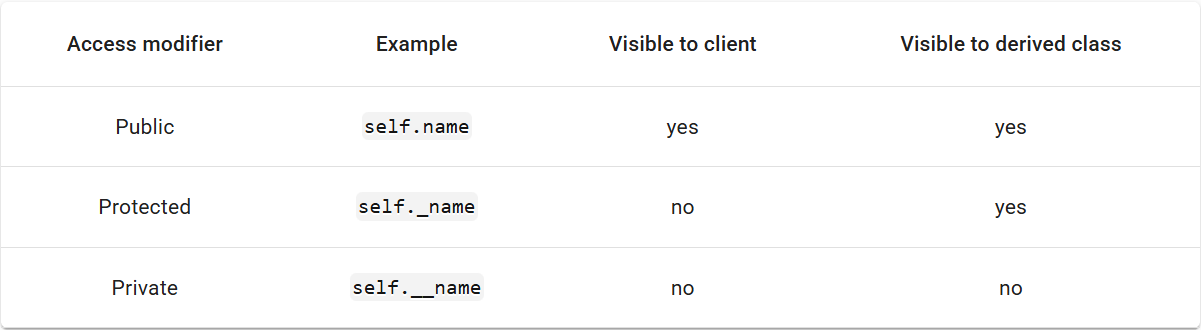

*Access modifier* juga bekerja dengan cara yang sama untuk semua jenis trait. Contoh:

In [ ]:
class Person:
    def __init__(self, name: str):
        self._name = self._capitalize_initials(name)

    def _capitalize_initials(self, name):
        name_capitalized = []
        for n in name.split(" "):
            name_capitalized.append(n.capitalize())

        return " ".join(name_capitalized)

    def __repr__(self):
        return self.__name

class Footballer(Person):

    def __init__(self, name: str, nickname: str, position: str):
        super().__init__(name)
        # the method is available as it is protected in the base class
        self.__nickname = self._capitalize_initials(nickname)
        self.__position = position

    def __repr__(self):
        r =  f"Footballer - name: {self._name}, nickname: {self.__nickname}"
        r += f", position: {self.__position}"
        return r

# Test the classes
if __name__ == "__main__":
    jp = Footballer("peter pythons", "pyper", "forward")
    print(jp)

### Latihan

Kerjakan latihan di <https://programming-25.mooc.fi/part-10/2-access-modifiers>